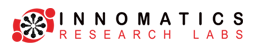

### 1. Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

### 2. Loading the raw data

#### Load the data from a .csv in the same folder

In [3]:
df = pd.read_csv(r'C:\Users\ankit\anaconda3\Himanshu_Data_Science\Innomatics\Assignment\Assignment for Linear Regression (1)\linear.csv')

#### Let's explore the top 5 rows of the df


In [5]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### 3. Exploring the descriptive statistics of the variables
-  Descriptive statistics are very useful for initial exploration of the variables
- By default, only descriptives for the numerical variables are shown
- To include the categorical ones, you should specify this with an argument

In [6]:
df.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Dealing with missing values

#### 4. Find the missing values from the data if any
- data.isnull() # shows a df with the information whether a data point is null. 
- Since True = the data point is missing, while False = the data point is not missing, we can sum them.
- This will give us the total number of missing values feature-wise.

In [7]:
df.isnull().sum()



Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [8]:
print("Price has", format((df.Price.isnull().sum()/df.Price.count())*100,".2f"), "% Null values and EngineV has" , format((df.EngineV.isnull().sum()/df.EngineV.count()), ".2f"), "% Null Values which are less then 5%" ) 

Price has 4.12 % Null values and EngineV has 0.04 % Null Values which are less then 5%


#### 5. Let's simply drop all missing values
Note: This is not always recommended, however, when we remove less than 5% of the data, it is okay

In [9]:
df = df.dropna()

#### 6. Let's check the descriptives without the missing values


In [10]:
df.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring the PDFs for Numerical Variables in the DataFrame

#### 7. A great step in the data exploration is to display the probability distribution function (PDF) of a variable
- The PDF will show us how that variable is distributed 
- This makes it very easy to spot anomalies, such as outliers
- The PDF is often the basis on which we decide whether we want to transform a feature

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


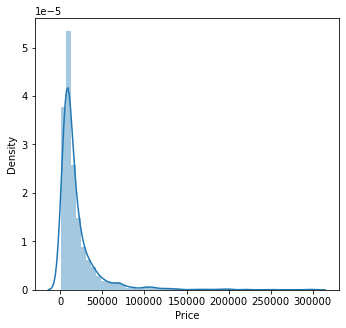

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df.Price)
plt.show()

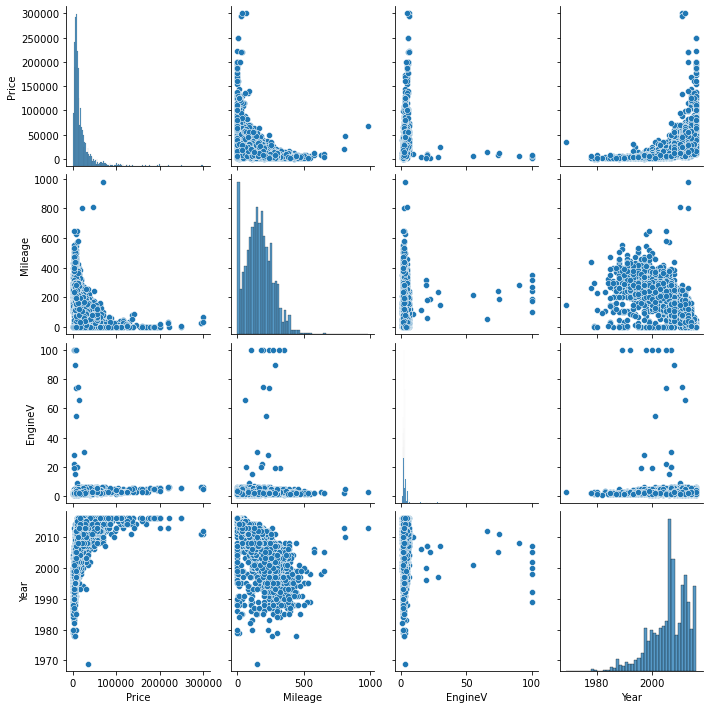

In [12]:
sns.pairplot(df)

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [14]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Dealing with outliers
Hint: Use IQR or Z Score

#### 8A. Identify the Outliers which are presented in `Price` Column

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

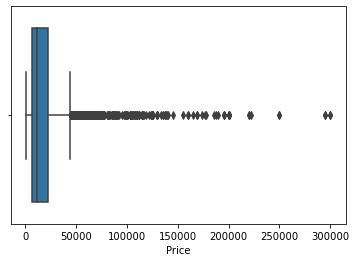

In [15]:
sns.boxplot(df.Price)

In [16]:
# Using IQR - interquntile Range 

Q1 = df['Price'].quantile(.25)
Q2 = df['Price'].quantile(.5)
Q3 = df['Price'].quantile(.75)
IQR = Q3-Q1

# Upper limit and Lower limit
lw = Q1-1.5*IQR
up = Q1+1.5*IQR
print(lw,up)

-15352.5 29350.5


In [17]:
print(df['Price'][df['Price']>up].count())


681


#### 8B. Remove the Outliers which are presented in `Price` Column

In [18]:
#pd.set_option('display.max_rows', None)

df.drop(df[df['Price'] > up].index, inplace = True)

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Density'>

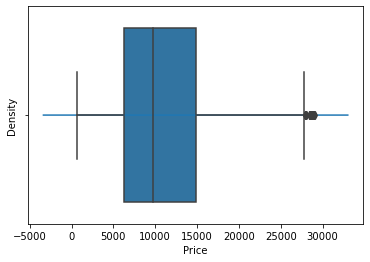

In [19]:
sns.distplot(df.Price)
sns.boxplot(df.Price)

In [20]:

Q1 = df['Price'].quantile(.25)
Q2 = df['Price'].quantile(.5)
Q3 = df['Price'].quantile(.75)
IQR = Q3-Q1

# Upper limit and Lower limit
lw = Q1-1.5*IQR
up = Q1+1.5*IQR
print(lw,up)

-6600.0 19200.0


In [21]:
print(df['Price'][df['Price']>up].count())

473


In [22]:
df.drop(df[df['Price'] > up].index, inplace = True)

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

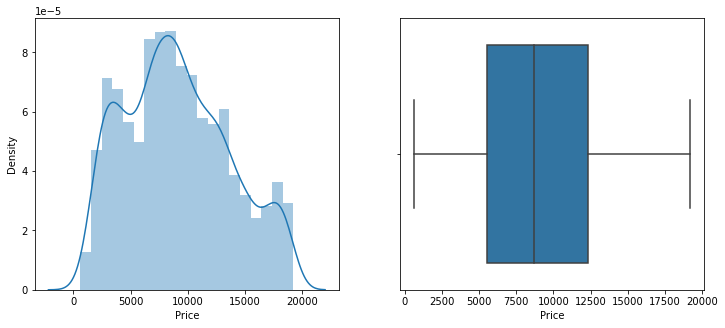

In [23]:
plt.figure(figsize = (12,5))

plt.subplot(121)

sns.distplot(df.Price)
plt.subplot(122)
sns.boxplot(df.Price)

#### 8C. Again Check the Distribution for `Price` Column and say something about distribution plot

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

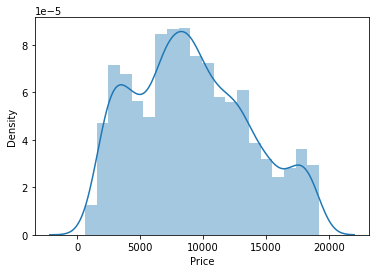

In [24]:
sns.distplot(df.Price)

#### 9A. Same identify and remove the outliers in `Milage` column

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

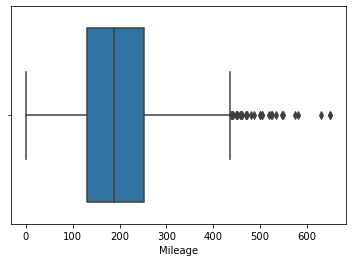

In [25]:
sns.boxplot(df.Mileage)

In [26]:
Q1 = df['Mileage'].quantile(.25)
Q2 = df['Mileage'].quantile(.5)
Q3 = df['Mileage'].quantile(.75)

IQR = Q3-Q1

lw = Q1-1.5*IQR
up = Q3+1.5*IQR


In [27]:
print(df['Mileage'][df['Mileage']>up].count())

37


In [28]:
df.drop(df[df['Mileage']>up].index, inplace = True)

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

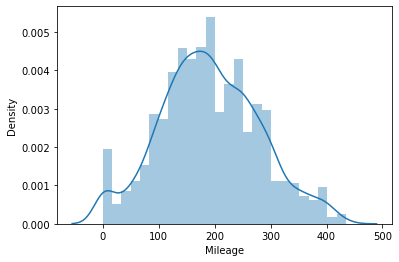

In [29]:
sns.distplot(df.Mileage)

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

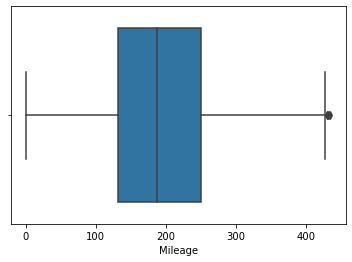

In [30]:
sns.boxplot(df.Mileage)

In [31]:
Q1 = df['Mileage'].quantile(.25)
Q2 = df['Mileage'].quantile(.5)
Q3 = df['Mileage'].quantile(.75)

IQR = Q3-Q1

lw = Q1-1.5*IQR
up = Q3+1.5*IQR


In [32]:
print(df['Mileage'][df['Mileage']>up].count())

5


In [33]:
df.drop(df[df['Mileage']>up].index, inplace = True)

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

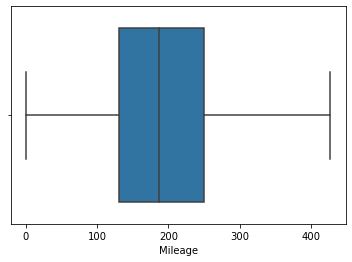

In [34]:
sns.boxplot(df.Mileage)

#### 9B. Check the distribution after deleting the outliers in `milage` column and say something about distribution.

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

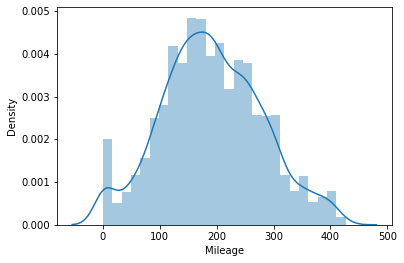

In [35]:
sns.distplot(df.Mileage)

#### 10A. Identify and remove the outliers from `EngineV` column



C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

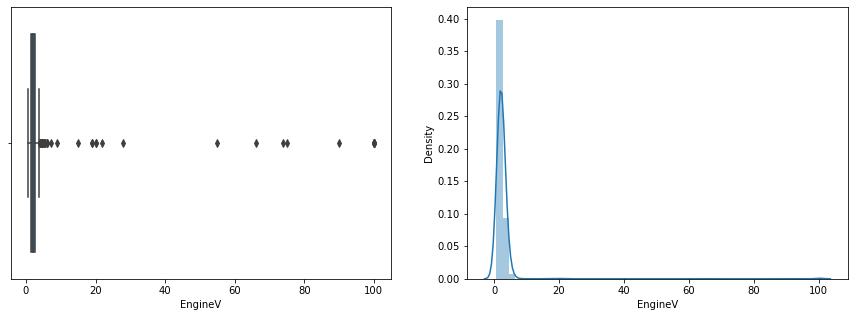

In [36]:
plt.figure(figsize = (15,5))

plt.subplot(121)
sns.boxplot(df.EngineV)

plt.subplot(122)
sns.distplot(df.EngineV)

In [37]:
Q1 = df['EngineV'].quantile(.25)
Q2 = df['EngineV'].quantile(.5)
Q3 = df['EngineV'].quantile(.75)

IQR = Q3-Q1

lw = Q1-1.5*IQR
up = Q3+1.5*IQR


In [38]:
print(df['EngineV'][df['EngineV']>up].count())

128


In [39]:
df.drop(df[df['EngineV']>up].index, inplace = True)

#### 10B. Ckeck the distribution plot after deleting the outliers and say something about it.

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

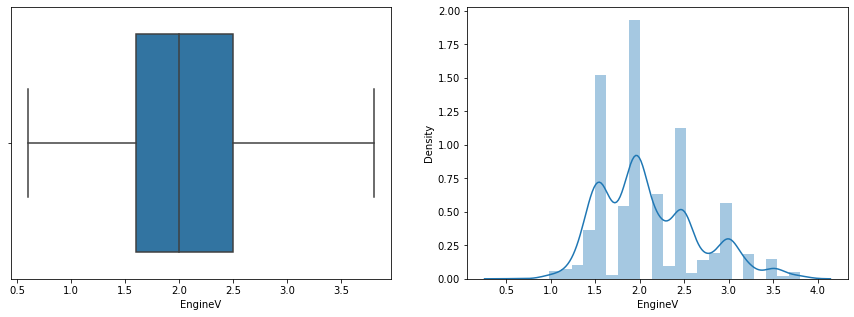

In [40]:
plt.figure(figsize = (15,5))

plt.subplot(121)
sns.boxplot(df.EngineV)

plt.subplot(122)
sns.distplot(df.EngineV)

In [41]:
# CODE HERE

#### 10C. Perform Lable & One-Hot Encoding For the Categorical Variable

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2701 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         2701 non-null   object 
 1   Price         2701 non-null   float64
 2   Body          2701 non-null   object 
 3   Mileage       2701 non-null   int64  
 4   EngineV       2701 non-null   float64
 5   Engine Type   2701 non-null   object 
 6   Registration  2701 non-null   object 
 7   Year          2701 non-null   int64  
 8   Model         2701 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 211.0+ KB


In [43]:
df.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

brand = LabelEncoder()
df['Brand'] = brand.fit_transform(df['Brand'])
df['Body'] = brand.fit_transform(df['Body'])
df['Engine Type'] = brand.fit_transform(df['Engine Type'])
df['Registration'] = brand.fit_transform(df['Registration'])
df['Model'] = brand.fit_transform(df['Model'])

In [45]:
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,1,4200.0,3,277,2.0,3,1,1991,18
1,2,7900.0,5,427,2.9,0,1,1999,167
4,5,18300.0,0,120,2.0,3,1,2011,145
7,0,14200.0,4,200,2.7,0,1,2006,43
8,4,10799.0,4,193,1.5,0,1,2012,122
...,...,...,...,...,...,...,...,...,...
4338,6,11500.0,5,163,2.5,0,1,2008,182
4339,5,17900.0,3,35,1.6,3,1,2014,75
4341,1,6500.0,3,1,3.5,3,1,1999,31
4342,1,8000.0,3,194,2.0,3,1,1985,25


In [53]:
a = df

print(a.columns)

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')


In [68]:
x = a.columns

for i in x:
    print(i,(a[i].unique()))

Brand [1 2 5 0 4 6 3]
Price [ 4200.    7900.   18300.   14200.   10799.    1400.   11950.    2500.
  9500.   10500.    8600.    2990.    3500.    7500.    6800.    6500.
 13566.    8500.    2900.   17900.    9800.   14500.    6000.    7700.
  9600.   12800.    3700.    8250.    9200.    5000.    8900.    7800.
  1650.    9700.    9999.    4300.    3000.    8700.    9000.   13400.
  9850.   11990.   13708.5   8200.    6999.    6750.   18500.   14299.
 17000.    2650.    4000.   11000.    4099.    4500.    6700.    6150.
  4900.   19200.   11100.   10300.    1500.   12700.    8000.    7100.
 10850.   18100.    8990.     600.   13000.   13900.   12200.   13500.
 16900.   10700.   17300.    2200.    6900.    8850.    3100.    6100.
  8800.   10299.    9100.    9950.   12900.    8100.   10100.    1900.
 10800.   15300.    2350.   17650.   12999.   18000.   10650.    1389.
  4599.    3800.    1800.    4999.    4700.    9299.    2800.   11500.
 10200.   16999.    9900.    7200.   13700.    78

In [70]:
one_hot_encoded_data = pd.get_dummies(a, columns = ['Brand', 'Body', 'Engine Type', 'Registration'])
new_data = pd.DataFrame(one_hot_encoded_data)


In [71]:
new_data

,Price,Mileage,EngineV,Year,Model,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,...,Body_2,Body_3,Body_4,Body_5,Engine Type_0,Engine Type_1,Engine Type_2,Engine Type_3,Registration_0,Registration_1
0,4200.0,277,2.0,1991,18,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,7900.0,427,2.9,1999,167,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
4,18300.0,120,2.0,2011,145,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7,14200.0,200,2.7,2006,43,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
8,10799.0,193,1.5,2012,122,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,11500.0,163,2.5,2008,182,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4339,17900.0,35,1.6,2014,75,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4341,6500.0,1,3.5,1999,31,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4342,8000.0,194,2.0,1985,25,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [72]:
new_data.shape

(2701, 24)

### Multicollinearity

#### 11A. Say about Multicollinearity and Find the Multicollinearity variables in the Dataset. 


In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

mlc = df.drop('Price', axis =1)

In [74]:
mlc.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'Model'],
      dtype='object')

In [75]:
vif_df = pd.DataFrame()
vif_df['Feature'] = mlc.columns


In [76]:
vif_df['VIF'] = [variance_inflation_factor(mlc.values,i) for i in range(len(mlc.columns))]

In [77]:
vif_df

,Feature,VIF
0,Brand,5.997961
1,Body,6.274777
2,Mileage,6.904828
3,EngineV,19.947682
4,Engine Type,2.399338
5,Registration,8.787139
6,Year,49.758545
7,Model,6.022769


Engine V and Year has very high values.SO these columns would be removed from here.
In general it should not go up ny 5 and up till 10 it is workable but the above values are very high.

In [78]:
mlc.drop(['Engine Type','Year'], axis = 1, inplace = True)

In [125]:
mlc.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Registration', 'Model'], dtype='object')

#### 11B. Show the variables which are having Multicollinearity.

Hint: VIF Score

Engine V and Year has very high values.SO these columns would be removed from here.
In general it should not go up ny 5 and up till 10 it is workable but the above values are very high.

### Model fit

#### 12A. Perform The Model fit & Model output using OLS 

In [79]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [80]:
ols_data = df
ols_data.rename({'Engine Type' : 'EngineType'},axis = 1, inplace = True) 



In [81]:
ols_data

,Brand,Price,Body,Mileage,EngineV,EngineType,Registration,Year,Model
0,1,4200.0,3,277,2.0,3,1,1991,18
1,2,7900.0,5,427,2.9,0,1,1999,167
4,5,18300.0,0,120,2.0,3,1,2011,145
7,0,14200.0,4,200,2.7,0,1,2006,43
8,4,10799.0,4,193,1.5,0,1,2012,122
...,...,...,...,...,...,...,...,...,...
4338,6,11500.0,5,163,2.5,0,1,2008,182
4339,5,17900.0,3,35,1.6,3,1,2014,75
4341,1,6500.0,3,1,3.5,3,1,1999,31
4342,1,8000.0,3,194,2.0,3,1,1985,25


In [185]:
ols_data.columns



Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Registration', 'Year',
       'Model'],
      dtype='object')

In [249]:
olsmodel = smf.ols(formula = 'Price~Brand+Body+Mileage+EngineV+EngineType+Registration+Year+Model', data = ols_data).fit()

In [176]:
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     777.6
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:46:31   Log-Likelihood:                -24955.
No. Observations:                2701   AIC:                         4.993e+04
Df Residuals:                    2692   BIC:                         4.998e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -9.33e+05   1.93e+04    -48.347      0.000   -9.71e+05   -8.95e+05
Brand          -87.9377     29.224     -3.009      0.003    -145.241     -30.635
Body          -464.9731     35.927    -12.942      0.000    -535.421    -394.525
Mileage         -2.6690      0.709     -3.763      0.000      -4.060      -1.278
EngineV       2965.3960     98.676     30.052      0.000    2771.908    3158.884
EngineType      39.3188     41.868      0.939      0.348     -42.777     121.415
Registration  4544.0817    152.856     29.728      0.000    4244.355    4843.808
Year           465.8856      9.603     48.514      0.000     447.056     484.716
Model            1.7824      1.028      1.733      0.083      -0.234       3.799
==============================================================================
Omnibus:                       96.102   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.986
Skew:                           0.330   Prob(JB):                     7.33e-33
Kurtosis:                       3.938   Cond. No.                     8.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

EngineType has high probability 0.348 so we can drop the column

#### 12B. Explain the Model Evaluation metrics in OLS method.

 **Note:** Give The Explanation about R-square, Adjusted.R-Square and Explain the P-Value in OLS Table

the best R2 possible is 1 and this model has .698. which is a good score which menas that the model has reduced 70% error. R2 and Adj R2 which have no difference is a good   

#### 13A. Feature Selection using with Forward Selection

In [82]:
#ols_data.drop('Engine', axis = 1, inplace = True)

In [83]:
olsmodel2 = smf.ols(formula = 'Price~Brand+Body+Mileage+EngineV+Registration+Year+Model', data = ols_data).fit()

In [84]:
olsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     888.6
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:20:11   Log-Likelihood:                -24956.
No. Observations:                2701   AIC:                         4.993e+04
Df Residuals:                    2693   BIC:                         4.997e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -9.294e+05   1.89e+04    -49.163      0.000   -9.66e+05   -8.92e+05
Brand          -86.8075     29.198     -2.973      0.003    -144.061     -29.554
Body          -474.9521     34.319    -13.839      0.000    -542.247    -407.657
Mileage         -2.8091      0.693     -4.051      0.000      -4.169      -1.449
EngineV       2952.5520     97.721     30.214      0.000    2760.936    3144.168
Registration  4569.2231    150.490     30.362      0.000    4274.136    4864.310
Year           464.1312      9.419     49.274      0.000     445.661     482.601
Model            1.5692      1.003      1.564      0.118      -0.398       3.536
==============================================================================
Omnibus:                       96.872   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.676
Skew:                           0.329   Prob(JB):                     1.91e-33
Kurtosis:                       3.952   Cond. No.                     7.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###Interpretations
the P values are near to zero for all the column after removing Engine Type.

#### 13B. Feature Selection using with Backward Selection

**interpretation : As there are no high p values after removing the Engine Type.**

#### 14A. Explain about Assumption of errors and predictors


In [87]:
###CODEHERE

#### 14B. Perform Residual Analysis Give The Interpretations.

In [90]:
from sklearn.linear_model import  LinearRegression
reg = LinearRegression()

In [91]:
new_data.columns

Index(['Price', 'Mileage', 'EngineV', 'Year', 'Model', 'Brand_0', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5', 'Brand_6', 'Body_0',
       'Body_1', 'Body_2', 'Body_3', 'Body_4', 'Body_5', 'Engine Type_0',
       'Engine Type_1', 'Engine Type_2', 'Engine Type_3', 'Registration_0',
       'Registration_1'],
      dtype='object')

In [92]:
y = new_data['Price']

In [93]:
X = new_data


In [94]:
X.drop('Price', axis = 1 , inplace = True)

In [270]:
X

,Mileage,EngineV,Year,Model,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Brand_6,Body_0,Body_1,Body_2,Body_3,Body_4,Body_5,Engine Type_0,Engine Type_1,Engine Type_2,Engine Type_3,Registration_0,Registration_1
0,277,2.0,1991,18,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,427,2.9,1999,167,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
4,120,2.0,2011,145,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1
7,200,2.7,2006,43,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
8,193,1.5,2012,122,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,163,2.5,2008,182,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
4339,35,1.6,2014,75,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
4341,1,3.5,1999,31,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4342,194,2.0,1985,25,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1


In [95]:
reg.fit(X,y)

LinearRegression()

In [96]:
reg.coef_

array([-4.49747420e+00,  1.98913206e+03,  4.74212250e+02,  3.56549381e+00,
        1.03902835e+03,  1.36119211e+03,  1.03156340e+03, -1.70771253e+03,
       -2.30899858e+03,  4.87924624e+02,  9.70026290e+01,  2.42550295e+03,
       -4.91734406e+02,  6.12177153e+01, -4.70901542e+02, -1.80464418e+02,
       -1.34362030e+03,  9.59396023e+01, -9.25822275e+01, -5.14376645e+00,
        1.78639169e+00, -2.47334216e+03,  2.47334216e+03])

In [97]:
reg.intercept_

-946711.6877767361

In [ ]:
#Not sure why the intercept is this big value

In [277]:
X.shape

(2701, 23)

In [278]:
y.shape

(2701,)

#Intepretationsa

#### 15A. Split The Dataset into Train and Test (80:20) using Sklearn

In [105]:
from sklearn.model_selection import train_test_split




In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [107]:
print(len(X), len(X_train), len(X_test))

2701 2160 541


#### 15B. Perform the Linear Regression Model fit using Sklearn.

In [109]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [110]:
reg.fit(X_train, y_train)

LinearRegression()

In [111]:
reg.coef_

array([   -4.61984606,  1921.54285917,   484.56636481,     3.59912357,
        1059.68388038,  1485.01143418,  1098.5774733 , -1860.3500717 ,
       -2359.32184136,   428.80339617,   147.59572904,  2460.34398982,
        -521.48666824,    26.46282142,  -436.05818816,  -136.26752007,
       -1392.99443478,    66.8176929 ,   -67.72825238,     4.40790415,
          -3.49734467, -2446.8389609 ,  2446.8389609 ])

In [112]:
reg.intercept_

-967244.1574166759

In [113]:
y_pred = reg.predict(X)

In [297]:
print(y_pred)

[ 3528.85158833  7864.02109951 16295.43388444 ... 11483.67296059
  1088.59120852 13201.98819917]


C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

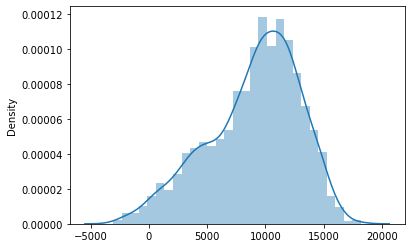

In [299]:
sns.distplot(y_pred)

#### 15C. Explain about Lasso Regression and Perform the Lasso Regression

In [ ]:
###CODEHERE

#### 15D. Explain about Ridge Regression and Perform the Ridge Regression

In [ ]:
###CODEHERE

### Give the Conclusions about the Model fits for What you Observe.

In [310]:
X.head(1).values

array([[2.770e+02, 2.000e+00, 1.991e+03, 1.800e+01, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]])

In [312]:
reg.predict([[2.770e+02, 2.000e+00, 1.991e+03, 1.800e+01, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]])

array([3528.85158833])

I took the first row from the data and predicted the Price which is  3528.85158833